# 训练网络
使用高斯仿真数据训练网络

In [3]:
from MyPackages.classifiers.neural_net import TwoLayerNet
import time
import numpy as np
#  mean_a = [-1,0], mean_b = [1,0], cova = [[1, 0.5], [0.5, 1]], covb = [[1, -0.5], [-0.5, 1]]

num_inputs, input_size = X.shape

dataset = np.concatenate((X,y.reshape(num_inputs, -1)),axis=1)   # to shuffle the dataset
np.random.shuffle(dataset)
X_train = dataset[:num_inputs - 400, :2]
y_train = dataset[:num_inputs-400, 2].astype(int)
X_val = dataset[num_inputs - 400:, :2]
y_val = dataset[num_inputs-400:, 2].astype(int)


net  = TwoLayerNet(input_size, hidden_size=10, output_size=2, std=1e-1)

start = time.time()
stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=1e-1, reg=5e-6,
            num_iters=10000, verbose=False)
print("cost {}s".format(time.time() - start))

print('Final training loss: ', stats['loss_history'][-1])



cost 5.00411319732666s
Final training loss:  0.34563635335118814


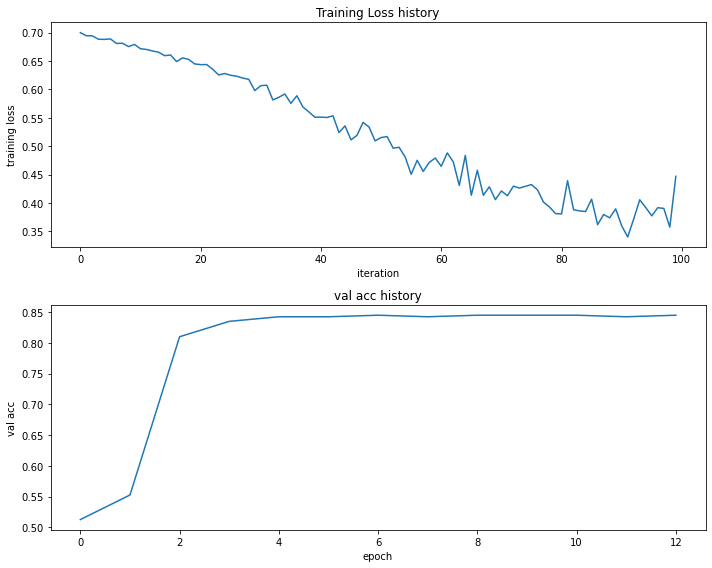

In [27]:
# plot the loss history
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(2, 1, 2)
plt.plot(stats['val_acc_history'])
plt.xlabel('epoch')
plt.ylabel('val acc')
plt.title('val acc history')
plt.tight_layout() 
plt.savefig("LossAndAcc_Gaussian.jpg")

plt.show()

In [26]:
print(np.max(stats['val_acc_history']))

0.845


e:\taskandanswer\python\pytorchenvironment\pytorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


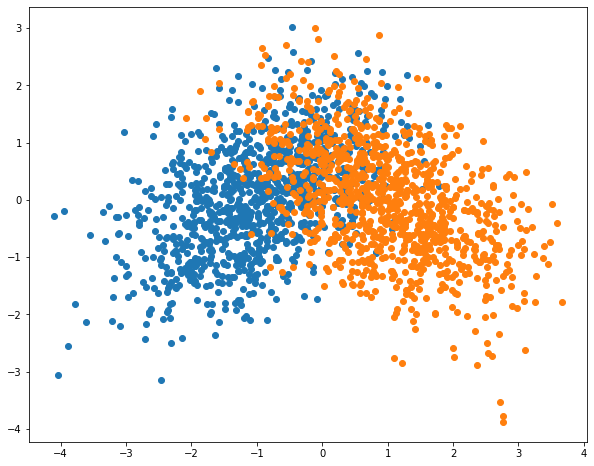

In [29]:
fig, ax = plt.subplots()
ax.scatter(X[:1000,0], X[:1000,1])
ax.scatter(X[1000:,0], X[1000:,1])
fig.show()
fig.savefig("dataset_visualize_Gaussian.jpg")

# 导入CIFAR10数据

In [2]:
from MyPackages.data_utils import load_CIFAR10
import os
datasets_path = os.environ['dataset']

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    #cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    cifar10_dir = os.path.join(datasets_path, "cifar-10-batches-py")  
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [10]:
print(np.max(y_train,axis=0))

9


# 使用CIFAR10训练网络

In [67]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1500: loss 2.302556
iteration 100 / 1500: loss 2.301985
iteration 200 / 1500: loss 2.294662
iteration 300 / 1500: loss 2.255582
iteration 400 / 1500: loss 2.161055
iteration 500 / 1500: loss 2.158442
iteration 600 / 1500: loss 2.079667
iteration 700 / 1500: loss 2.043033
iteration 800 / 1500: loss 2.022348
iteration 900 / 1500: loss 2.031319
iteration 1000 / 1500: loss 1.952739
iteration 1100 / 1500: loss 1.878719
iteration 1200 / 1500: loss 1.877028
iteration 1300 / 1500: loss 1.805600
iteration 1400 / 1500: loss 1.868396
Validation accuracy:  0.335


# 观察训练结果

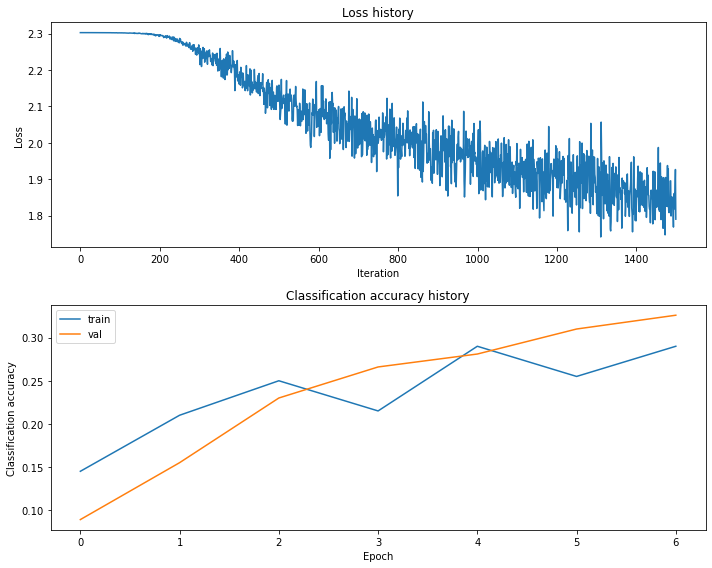

In [68]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.savefig("LossAndAcc_CIFAR10_reg=0.jpg")
plt.show()

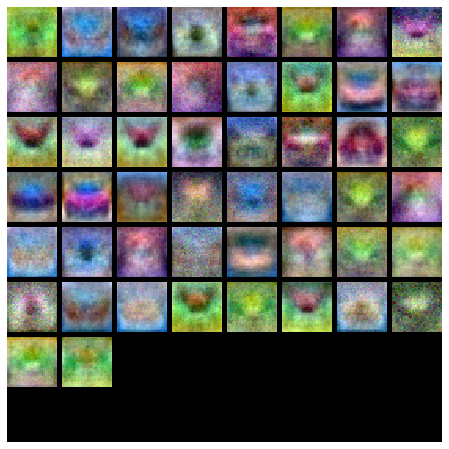

In [48]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)


(64, 3072)


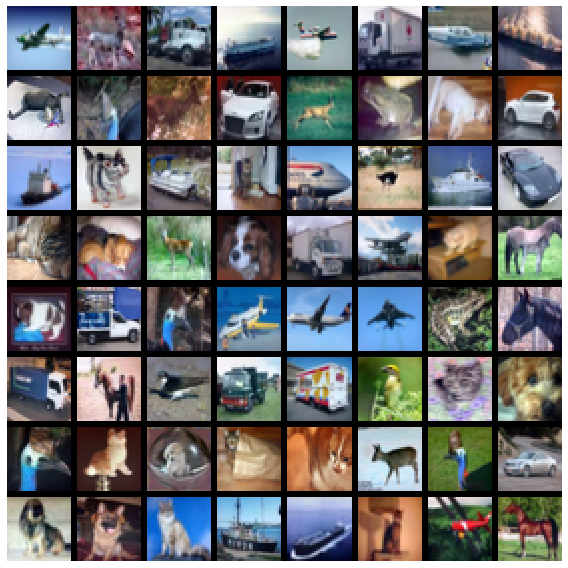

In [34]:
import numpy.random as random
idx = random.choice(range(49000) , 64)
vs_batch = X_train[idx]
print(vs_batch.shape)
vs_batch = vs_batch.reshape(64, 32 ,32 , 3)
plt.imshow(visualize_grid(vs_batch, padding=3).astype('uint8'))
plt.gca().axis('off')
plt.tight_layout()
plt.savefig("dataset_visualize_CIFAR10.jpg")
plt.show()

# 调节超参数

In [78]:
best_net = None # store the best model

results = {}
best_val_acc = 0
input_size = 32 * 32 * 3
num_classes = 10

learning_rates = np.array([0.7, 0.8, 0.9, 1, 1.1])*1e-3
regularization_strengths = [0.75, 1, 1.25]

count = 0 
print('running')
for lr in learning_rates:
    for reg in regularization_strengths:
        print('{}'.format(count), end= ""),
        net = TwoLayerNet(input_size, 125, num_classes)
        # Train the network
        stats = net.train(X_train, y_train, X_val, y_val,
        num_iters=1500, batch_size=200,
        learning_rate=lr, learning_rate_decay=0.95,
        reg= reg, verbose=False)
        val_acc = (net.predict(X_val) == y_val).mean()
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_net = net     
        results[(lr,reg)] = val_acc
        count += 1
print("\n finshed")



running
01234567891011121314
 finshed


In [79]:
# Print out results.
for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print('lr {} reg {} val accuracy: {}' .format(lr, reg,  val_acc))
    
print("best validation accuracy achieved during cross validation:{}".format(best_val_acc))

lr 0.0007 reg 0.75 val accuracy: 0.494
lr 0.0007 reg 1 val accuracy: 0.48
lr 0.0007 reg 1.25 val accuracy: 0.481
lr 0.0008 reg 0.75 val accuracy: 0.492
lr 0.0008 reg 1 val accuracy: 0.483
lr 0.0008 reg 1.25 val accuracy: 0.48
lr 0.0009000000000000001 reg 0.75 val accuracy: 0.479
lr 0.0009000000000000001 reg 1 val accuracy: 0.497
lr 0.0009000000000000001 reg 1.25 val accuracy: 0.47
lr 0.001 reg 0.75 val accuracy: 0.468
lr 0.001 reg 1 val accuracy: 0.494
lr 0.001 reg 1.25 val accuracy: 0.478
lr 0.0011 reg 0.75 val accuracy: 0.472
lr 0.0011 reg 1 val accuracy: 0.497
lr 0.0011 reg 1.25 val accuracy: 0.502
best validation accuracy achieved during cross validation:0.502


In [80]:
new_results = {}
index = 0
for lr, reg in sorted(results):
    new_results[index] = {"learning_rates": lr, "regularization_strengths": reg, "val acc" : results[(lr, reg)]}
    index += 1

In [81]:
import json
with open("log_no_hidden_size.json", 'w') as f:
    json.dump(new_results, f)

In [82]:
with open('log_no_hidden_size.json', 'r') as f:
    test = json.load(f)
for _ , item in test.items():
    for key, value in item.items():
        print("{}:{}".format(key,value))

learning_rates:0.0007
regularization_strengths:0.75
val acc:0.494
learning_rates:0.0007
regularization_strengths:1
val acc:0.48
learning_rates:0.0007
regularization_strengths:1.25
val acc:0.481
learning_rates:0.0008
regularization_strengths:0.75
val acc:0.492
learning_rates:0.0008
regularization_strengths:1
val acc:0.483
learning_rates:0.0008
regularization_strengths:1.25
val acc:0.48
learning_rates:0.0009000000000000001
regularization_strengths:0.75
val acc:0.479
learning_rates:0.0009000000000000001
regularization_strengths:1
val acc:0.497
learning_rates:0.0009000000000000001
regularization_strengths:1.25
val acc:0.47
learning_rates:0.001
regularization_strengths:0.75
val acc:0.468
learning_rates:0.001
regularization_strengths:1
val acc:0.494
learning_rates:0.001
regularization_strengths:1.25
val acc:0.478
learning_rates:0.0011
regularization_strengths:0.75
val acc:0.472
learning_rates:0.0011
regularization_strengths:1
val acc:0.497
learning_rates:0.0011
regularization_strengths:1.25


In [83]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.502


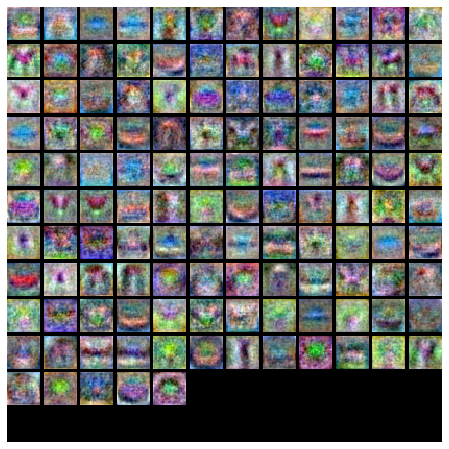

In [58]:
# Visualize the weights of the best network
show_net_weights(best_net)
show_net_weights()

# 测试

In [89]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.492


In [87]:
best_net = TwoLayerNet(input_size, 125, num_classes)
best_stats = best_net.train(X_train, y_train, X_val, y_val,
        num_iters=1500, batch_size=200,
        learning_rate=0.0011, learning_rate_decay=0.95,
        reg= 1.25, verbose=True)

iteration 0 / 1500: loss 2.304983
iteration 100 / 1500: loss 1.933165
iteration 200 / 1500: loss 1.860013
iteration 300 / 1500: loss 1.845939
iteration 400 / 1500: loss 1.647634
iteration 500 / 1500: loss 1.600325
iteration 600 / 1500: loss 1.664196
iteration 700 / 1500: loss 1.682265
iteration 800 / 1500: loss 1.594003
iteration 900 / 1500: loss 1.558170
iteration 1000 / 1500: loss 1.611884
iteration 1100 / 1500: loss 1.616989
iteration 1200 / 1500: loss 1.639776
iteration 1300 / 1500: loss 1.454115
iteration 1400 / 1500: loss 1.520446


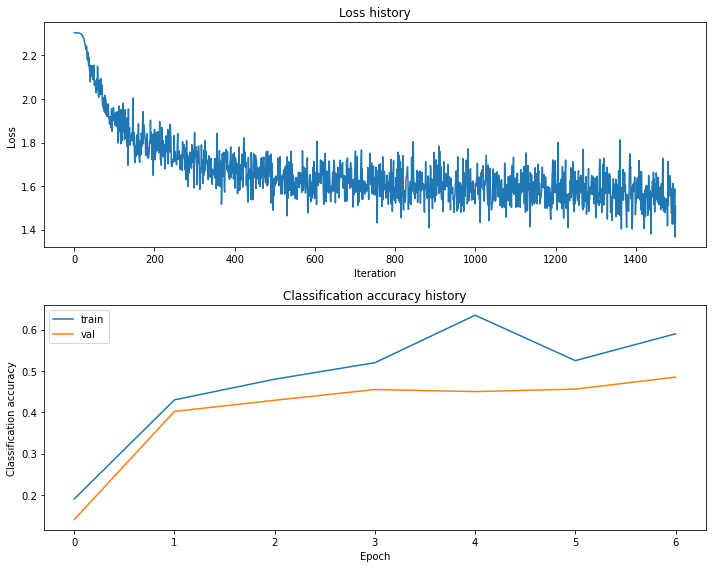

In [91]:
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')

plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.savefig("LossAndAcc_CIFAR10_best.jpg")
plt.show()

In [90]:
print(best_stats['val_acc_history'][-1])

0.485
